# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Makiatul Musyaropah
- **Email:** makiatulmusyaropah@gmail.com
- **ID Dicoding:** makiatulmsyr17

## Menentukan Pertanyaan Bisnis

1. Bagaimana kinerja penyewaan sepeda dalam beberapa tahun terakhir?
2. Bagaimana tren rata-rata penyewaan sepeda per bulan sepanjang tahun 2012?
2. Pada musim mana yang memiliki jumlah penyewaan terbanyak?
3. Berapa banyak jumlah penyewaan sepeda antara hari kerja dan akhir pekan?
4. Pada jam berapa penyewaan sepeda paling tinggi dalam sehari?





## Import Semua Packages/Library yang Digunakan

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Data hour_df

In [242]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/makiatulmsyr17/submission/refs/heads/main/data/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


#### Data day_df

In [243]:
day_df = pd.read_csv("https://raw.githubusercontent.com/makiatulmsyr17/submission/refs/heads/main/data/day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**
- Dataset hour berisi data perjam
- Dataset day berisi data perhari

Dataset ini mencatat jumlah penyewaan sepeda berdasarkan unit waktu tertentu, yaitu jam (hr) dan hari (dteday). Berikut adalah penjelasan dari setiap kolom :
- instant: Indeks unik untuk setiap rekaman data.
- dteday: Tanggal kejadian penyewaan sepeda.
- season: Musim dalam setahun dengan nilai:
   - 1: Musim semi (spring)
   - 2: Musim panas (summer)
   - 3: Musim gugur (fall)
   - 4: Musim dingin (winter)
- yr: Tahun data diambil, dengan nilai:
   - 0: Tahun 2011
   - 1: Tahun 2012
- mnth: Bulan kejadian penyewaan sepeda (1 = Januari, 2 = Februari, ..., 12 = Desember).
- hr: Jam dalam sehari (0 hingga 23).
- holiday: Menunjukkan apakah hari tersebut merupakan hari libur atau tidak (diambil dari situs DCHR Holiday Schedule).
- weekday: Hari dalam seminggu (0 = Minggu, 1 = Senin, ..., 6 = Sabtu).
- workingday: Menunjukkan apakah hari tersebut adalah hari kerja atau bukan.
  - 1: Hari kerja (bukan akhir pekan atau hari libur).
  - 0: Bukan hari kerja (akhir pekan atau hari libur).
- weathersit: Kondisi cuaca saat penyewaan sepeda terjadi, dengan kategori:
  - 1: Cerah, berawan sedikit, atau sebagian berawan.
  - 2: Berkabut dengan kondisi berawan atau mendung.
  - 3: Salju ringan, hujan ringan + badai petir + awan tersebar.
  - 4: Hujan deras + hujan es + badai petir + kabut, atau salju + kabut.
- temp: Suhu yang dinormalisasi dalam skala Celsius (dibagi dengan 41, yaitu suhu maksimum).
- atemp: Suhu yang dirasakan (feels-like temperature) dalam skala Celsius yang sudah dinormalisasi (dibagi dengan 50).
- hum: Kelembaban yang dinormalisasi (dibagi dengan 100).
- windspeed: Kecepatan angin yang dinormalisasi (dibagi dengan 67).
- casual: Jumlah pengguna sepeda kasual (tanpa registrasi).
- registered: Jumlah pengguna sepeda yang terdaftar.
- cnt: Jumlah total sepeda yang disewa, termasuk pengguna kasual dan terdaftar.


### Assessing Data

In [244]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


terdapat kolom yang tidak sesuai dengan type datanya yaitu kolom dteday

In [245]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Ini juga sama terdapat kolom yang tidak sesuai dengan type datanya yaitu kolom dteday

In [246]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [247]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Tidak ada missing values di kedua dataset

In [248]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())

Jumlah duplikasi:  0


In [249]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())


Jumlah duplikasi:  0


Tidak ada duplicate data  di kedua dataset

In [250]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [251]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Range nilai masing kolom sudah sesuai tidak ada kesalahan

**Insight:**
- Data secara keseluruhan sudah bagus, tapi terdapat kolom yang tidak sesuai dengan type datanya yaitu kolom dteday akan di ubah type datanya menjadi datetime.
- Beberapa kolom dengan nilai numerik sebenarnya merepresentasikan kategori, seperti yr, season, mnth, holiday, weekday, workingday, weathersit. Oleh karena itu, kolom-kolom ini akan dikonversi menjadi tipe data kategori atau string agar lebih mudah diinterpretasikan saat visualisasi data.(Mengubah nilai kategori numerik menjadi string yang lebih deskriptif)

### Cleaning Data

Mengubah type data kolom dteday dari object jadi  menjadi  datetime.

In [252]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

Cek untuk memastikan type data sudah berubah

In [253]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [254]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

type data sudah berubah ke datetime

Mengubah nilai kategori numerik menjadi string yang lebih deskriptif pada dataframe hour_df

In [255]:
# Mapping nilai kategori ke string yang lebih jelas
season_mapping = { "1": "Spring", "2": "Summer", "3": "Fall", "4": "Winter" }
yr_mapping = { "0": "2011", "1": "2012" }
mnth_mapping = { str(i): month for i, month in enumerate(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], 1) }
weekday_mapping = { "0": "Sunday", "1": "Monday", "2": "Tuesday", "3": "Wednesday", "4": "Thursday", "5": "Friday", "6": "Saturday" }
holiday_mapping = { "0": "No", "1": "Yes" }
workingday_mapping = { "0": "No", "1": "Yes" }


# Konversi kolom kategori ke string dengan label yang lebih deskriptif
hour_df["season"] = hour_df["season"].astype(str).map(season_mapping)
hour_df["yr"] = hour_df["yr"].astype(str).map(yr_mapping)
hour_df["mnth"] = hour_df["mnth"].astype(str).map(mnth_mapping)
hour_df["weekday"] = hour_df["weekday"].astype(str).map(weekday_mapping)
hour_df["holiday"] = hour_df["holiday"].astype(str).map(holiday_mapping)
hour_df["workingday"] = hour_df["workingday"].astype(str).map(workingday_mapping)

# Cek perubahan data
print(hour_df.head())
print(hour_df.dtypes)

   instant     dteday  season    yr mnth  hr holiday   weekday workingday  \
0        1 2011-01-01  Spring  2011  Jan   0      No  Saturday         No   
1        2 2011-01-01  Spring  2011  Jan   1      No  Saturday         No   
2        3 2011-01-01  Spring  2011  Jan   2      No  Saturday         No   
3        4 2011-01-01  Spring  2011  Jan   3      No  Saturday         No   
4        5 2011-01-01  Spring  2011  Jan   4      No  Saturday         No   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
instant                int64
dteday        datetime64[ns]
season                object
yr                

Mengubah nilai kategori numerik menjadi string yang lebih deskriptif pada dataframe day_df

In [256]:
# Mapping nilai kategori ke string yang lebih jelas
season_mapping = { "1": "Spring", "2": "Summer", "3": "Fall", "4": "Winter" }
yr_mapping = { "0": "2011", "1": "2012" }
mnth_mapping = { str(i): month for i, month in enumerate(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], 1) }
weekday_mapping = { "0": "Sunday", "1": "Monday", "2": "Tuesday", "3": "Wednesday", "4": "Thursday", "5": "Friday", "6": "Saturday" }
holiday_mapping = { "0": "No", "1": "Yes" }
workingday_mapping = { "0": "No", "1": "Yes" }
weathersit_mapping = {
    "1": "Clear/Few clouds",
    "2": "Mist/Cloudy",
    "3": "Light Snow/Rain",
    "4": "Heavy Rain/Snow"
}

# Konversi kolom kategori ke string dengan label yang lebih deskriptif
day_df["season"] = day_df["season"].astype(str).map(season_mapping)
day_df["yr"] = day_df["yr"].astype(str).map(yr_mapping)
day_df["mnth"] = day_df["mnth"].astype(str).map(mnth_mapping)
day_df["weekday"] = day_df["weekday"].astype(str).map(weekday_mapping)
day_df["holiday"] = day_df["holiday"].astype(str).map(holiday_mapping)
day_df["workingday"] = day_df["workingday"].astype(str).map(workingday_mapping)
day_df["weathersit"] = day_df["weathersit"].astype(str).map(weathersit_mapping)

# Cek perubahan data
print(day_df.head())
print(day_df.dtypes)

   instant     dteday  season    yr mnth holiday    weekday workingday  \
0        1 2011-01-01  Spring  2011  Jan      No   Saturday         No   
1        2 2011-01-02  Spring  2011  Jan      No     Sunday         No   
2        3 2011-01-03  Spring  2011  Jan      No     Monday        Yes   
3        4 2011-01-04  Spring  2011  Jan      No    Tuesday        Yes   
4        5 2011-01-05  Spring  2011  Jan      No  Wednesday        Yes   

         weathersit      temp     atemp       hum  windspeed  casual  \
0       Mist/Cloudy  0.344167  0.363625  0.805833   0.160446     331   
1       Mist/Cloudy  0.363478  0.353739  0.696087   0.248539     131   
2  Clear/Few clouds  0.196364  0.189405  0.437273   0.248309     120   
3  Clear/Few clouds  0.200000  0.212122  0.590435   0.160296     108   
4  Clear/Few clouds  0.226957  0.229270  0.436957   0.186900      82   

   registered   cnt  
0         654   985  
1         670   801  
2        1229  1349  
3        1454  1562  
4        151

**Insight:**
- Setelah melakukan konversi tipe data dan mengubah beberapa kolom numerik yang merepresentasikan kategori menjadi string dengan label yang lebih deskriptif, hasilnya telah sesuai dengan yang diharapkan. Data kini lebih mudah dipahami dan diinterpretasikan, terutama dalam proses analisis dan visualisasi.

## Exploratory Data Analysis (EDA)

### Explore hour_df

In [257]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,May,NaN,No,Saturday,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879,2512,11865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

Ringkasan Data Penyewaan Sepeda (`hour_df`)

Dataset ini berisi **17.379 baris data** dengan 16 kolom yang mencatat informasi penyewaan sepeda setiap jam. Berikut adalah beberapa ringkasan statistiknya:

 **Informasi Waktu dan Musim**  
- **Periode Data:** 1 Januari 2011 - 31 Desember 2012  
- **Musim dengan Data Terbanyak:** **Musim Gugur (Fall)**  
- **Tahun dengan Data Terbanyak:** **2012**  

**Rata-rata Penyewaan Sepeda**  
- **Total Rata-rata Penyewaan per Jam:** **189 sepeda**  
- **Jumlah Maksimum Penyewaan dalam 1 Jam:** **977 sepeda**  
- **Jumlah Minimum Penyewaan dalam 1 Jam:** **1 sepeda**  

**Pola Penyewaan Berdasarkan Waktu**  
- **Jam dengan Penyewaan Rata-rata Tertinggi:** **Pukul 17:00 (Sore)**  
- **Jam dengan Penyewaan Rata-rata Terendah:** **Pukul 04:00 (Dini Hari)**  

**Faktor Lingkungan yang Mempengaruhi Penyewaan**  
- **Suhu rata-rata:** **0.50 (dinormalisasi, berkisar antara 0-1)**  
- **Kelembaban rata-rata:** **62.7%**  
- **Kecepatan angin rata-rata:** **0.19 (dinormalisasi)**  

**Pola Penyewaan Berdasarkan Jenis Hari**  
- **Hari Kerja vs Akhir Pekan:** Lebih banyak penyewaan terjadi pada **hari kerja (weekday)** dibandingkan akhir pekan.  
- **Hari dengan Penyewaan Tertinggi:** **Sabtu**  


Melihat total penyewaan per jam

In [258]:
# Grouping by hour and summing the total rentals
rentals_per_hour = hour_df.groupby("hr")[["cnt"]].sum().reset_index()

# Renaming columns to English
rentals_per_hour.columns = ["Hour", "total_rentals"]

# Sorting values by total_rentals in descending order
rentals_per_hour = rentals_per_hour.sort_values(by="total_rentals", ascending=False)

# Display the result
rentals_per_hour

,Hour,total_rentals
17,17,336860
18,18,309772
8,8,261001
16,16,227748
19,19,226789
13,13,184919
12,12,184414
15,15,183149
14,14,175652
20,20,164550


**Insight :**

-  **Jam dengan Penyewaan Tertinggi**  
   - **Pukul 17:00 (5 sore) memiliki jumlah penyewaan tertinggi** sebanyak **336.860 kali**.  
   - **Pukul 18:00 (6 sore) dan 08:00 (8 pagi) juga memiliki jumlah penyewaan tinggi**.  
   - **Pola ini menunjukkan bahwa puncak penyewaan terjadi saat jam pulang kerja (sore) dan berangkat kerja (pagi)**.  

- **Jam dengan Penyewaan Menengah**  
   - Penyewaan juga cukup tinggi pada **pukul 12:00 - 15:00 (siang hingga sore)**.  
   - **Menunjukkan bahwa ada peningkatan penggunaan sepeda saat istirahat siang atau rekreasi sore hari**.  

-  **Jam dengan Penyewaan Terendah**  
   - **Pukul 04:00 memiliki penyewaan terendah (hanya 4.428 kali)**.  
   - **Pukul 3:00, 2:00, dan 1:00 juga memiliki jumlah penyewaan yang sangat rendah**, menunjukkan bahwa sedikit orang menyewa sepeda di dini hari.  

### Explore day_df

Melihat total Penyewaan per Tahun

In [259]:
# Grouping by year and summing the total rentals
performance_per_year = day_df.groupby("yr")[["cnt"]].sum().reset_index()

# Renaming columns to English
performance_per_year["yr"] = performance_per_year["yr"]
performance_per_year.columns = ["Year", "total_rentals"]

# Display the result
performance_per_year


,Year,total_rentals
0,2011,1243103
1,2012,2049576



**Insight**
- **Total Penyewaan per Tahun**  
   - **Pada tahun 2011, jumlah total penyewaan sepeda adalah 1.243.103 kali.**  
   - **Pada tahun 2012, jumlah total penyewaan meningkat menjadi 2.049.576 kali.**  
   - **Terjadi peningkatan sebesar 806.473 penyewaan dari tahun 2011 ke 2012** (sekitar **64,9% peningkatan**).  


 Menghitung rata-rata jumlah penyewaan sepeda beberapa bulan terakhir (2012)

In [260]:
# Filter only data for the year 2012 (yr == 2012)
average_per_month_2012 = day_df[day_df["yr"] == "2012"].groupby("mnth")[["cnt"]].mean().reset_index()

# Rename columns to be more descriptive
average_per_month_2012.columns = ["Month", "avg_rentals"]

# Sort by highest average rentals
average_per_month_2012 = average_per_month_2012.sort_values(by="avg_rentals", ascending=False)

# Display the result
average_per_month_2012


,Month,avg_rentals
11,Sep,7285.766667
1,Aug,6919.451613
6,Jun,6761.000000
5,Jul,6567.967742
10,Oct,6414.225806
8,May,6318.225806
0,Apr,5807.466667
7,Mar,5318.548387
9,Nov,5088.800000
2,Dec,3990.741935


**Insight :**
-  **Bulan dengan Penyewaan Tertinggi**  
   - **Juni memiliki rata-rata penyewaan tertinggi, yaitu 5.772 penyewaan per hari.**  
   - **September menempati posisi kedua dengan 5.766 penyewaan per hari.**  
   - **Agustus dan Juli juga memiliki angka penyewaan yang tinggi**, menunjukkan bahwa musim panas memiliki tingkat penyewaan yang lebih tinggi.

- **Bulan dengan Penyewaan Terendah**  
   - **Januari memiliki rata-rata penyewaan terendah, yaitu 2.176 penyewaan per hari.**  
   - **Februari dan Desember juga memiliki angka penyewaan yang rendah,** menunjukkan bahwa musim dingin atau cuaca buruk berdampak pada rendahnya penyewaan.

Melihat total jumlah penyewaan sepeda per musim

In [261]:
# Group by season and calculate total rentals
rentals_per_season = day_df.groupby("season")[["cnt"]].sum().reset_index()

# Rename the columns to be more descriptive
rentals_per_season.columns = ["Season", "total_rentals"]

# Sort the results by the total rentals in descending order
rentals_per_season = rentals_per_season.sort_values(by="total_rentals", ascending=False)

# Display the result
rentals_per_season


,Season,total_rentals
0,Fall,1061129
2,Summer,918589
3,Winter,841613
1,Spring,471348


**Insight:**
- **Musim dengan Penyewaan Tertinggi**  
   - **Musim Gugur (Fall) memiliki total penyewaan tertinggi, yaitu 1.061.129 penyewaan.**  
   - **Musim Panas (Summer) berada di posisi kedua dengan 918.589 penyewaan.**  
   - **Musim Dingin (Winter) masih memiliki jumlah penyewaan yang cukup tinggi, yaitu 841.613 penyewaan.**

- **Musim dengan Penyewaan Terendah**  
   - **Musim Semi (Spring) memiliki total penyewaan terendah, hanya 471.348 penyewaan.**  
   - Hal ini mungkin karena cuaca yang tidak menentu, seringnya hujan, atau peralihan musim yang membuat orang kurang tertarik untuk bersepeda.  

Melihat total penyewaan sepeda untuk hari kerja dan akhir pekan.

In [262]:
# Group by workingday and calculate total rentals
rentals_working_day = day_df.groupby("workingday")[["cnt"]].sum().reset_index()

# Rename the columns to be more descriptive
rentals_working_day.columns = ["day_type", "Total_Rentals"]

# Display the result
rentals_working_day


,day_type,Total_Rentals
0,No,1000269
1,Yes,2292410


**Insight**
- **Penyewaan Sepeda Lebih Tinggi pada Hari Kerja**  
   - Hari kerja (`Yes`): **2.292.410 penyewaan**  
   - Akhir pekan atau libur (`No`): **1.000.269 penyewaan**  
   - **Lebih dari dua kali lipat dibandingkan akhir pekan** → menunjukkan bahwa layanan sepeda lebih sering digunakan untuk **mobilitas harian daripada rekreasi.**

## Visualization & Explanatory Analysis

1. Bagaimana kinerja penyewaan sepeda dalam beberapa tahun terakhir?
2. Bagaimana tren rata-rata penyewaan sepeda per bulan sepanjang tahun 2012?
2. Pada musim mana yang memiliki jumlah penyewaan terbanyak?
3. Berapa banyak jumlah penyewaan sepeda antara hari kerja dan akhir pekan?
4. Pada jam berapa penyewaan sepeda paling tinggi dan paling rendah dalam sehari?





### Pertanyaan 1: Bagaimana kinerja penyewaan sepeda dalam beberapa tahun terakhir?

In [263]:
# Group by year and calculate total rentals
performance_per_year = day_df.groupby("yr")[["cnt"]].sum().reset_index()

# Rename the columns to be more descriptive
performance_per_year.columns = ["Year", "total_rentals"]

# Display the result
performance_per_year


,Year,total_rentals
0,2011,1243103
1,2012,2049576


<ipython-input-264-79ef7621fecb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Year", y="total_rentals", data=performance_per_year, palette=colors, ax=ax)


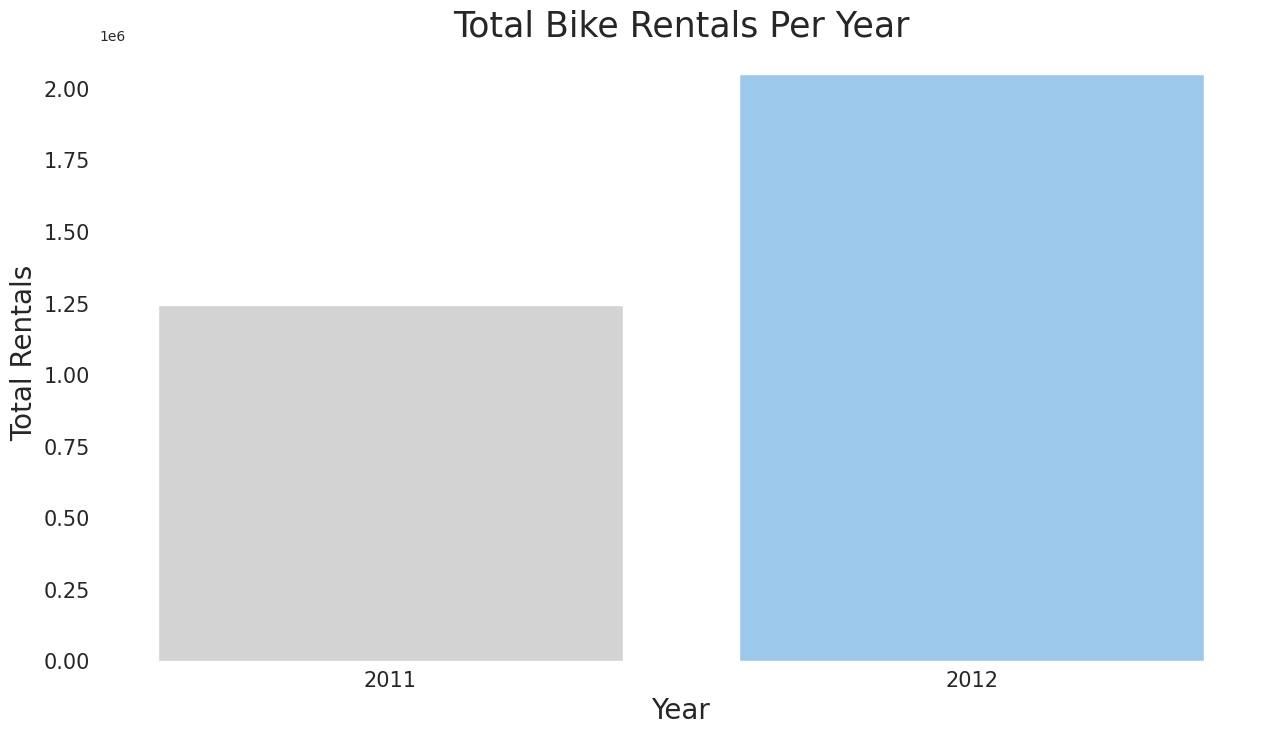

In [264]:
# Use a style with no background
sns.set_style("white")

# Determine the year with the highest rentals
max_year = performance_per_year.loc[performance_per_year["total_rentals"].idxmax(), "Year"]

# Define colors: the year with the highest rentals will have a different color
colors = ["#90CAF9" if year == max_year else "#D3D3D3" for year in performance_per_year["Year"]]

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Create a barplot for total rentals per year
sns.barplot(x="Year", y="total_rentals", data=performance_per_year, palette=colors, ax=ax)

# Remove background and borders
ax.set_facecolor("white")
for spine in ax.spines.values():
    spine.set_visible(False)

# Set labels and title
ax.set_ylabel("Total Rentals", fontsize=20)
ax.set_xlabel("Year", fontsize=20)
ax.set_title("Total Bike Rentals Per Year", fontsize=25)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)

# Display the plot
plt.show()


Kinerja penyewaan sepeda beberapa tahun terakhir mengalami peningkatan dari tahun 2011 ke 2012 total penyewaan meningkat

### Pertanyaan 2: Bagaimana tren rata-rata penyewaan sepeda per bulan sepanjang tahun 2012?

In [265]:
# Filter data only for the year 2012 (yr == 2012)
avg_permonth_2012 = day_df[day_df["yr"] == "2012"].groupby("mnth")[["cnt"]].mean().reset_index()

# Rename columns to make them clearer
avg_permonth_2012.columns = ["Month", "avg_rentals"]

# Sort by the highest average rentals
avg_permonth_2012 = avg_permonth_2012.sort_values(by="avg_rentals", ascending=False)

# Display the result
avg_permonth_2012


,Month,avg_rentals
11,Sep,7285.766667
1,Aug,6919.451613
6,Jun,6761.000000
5,Jul,6567.967742
10,Oct,6414.225806
8,May,6318.225806
0,Apr,5807.466667
7,Mar,5318.548387
9,Nov,5088.800000
2,Dec,3990.741935


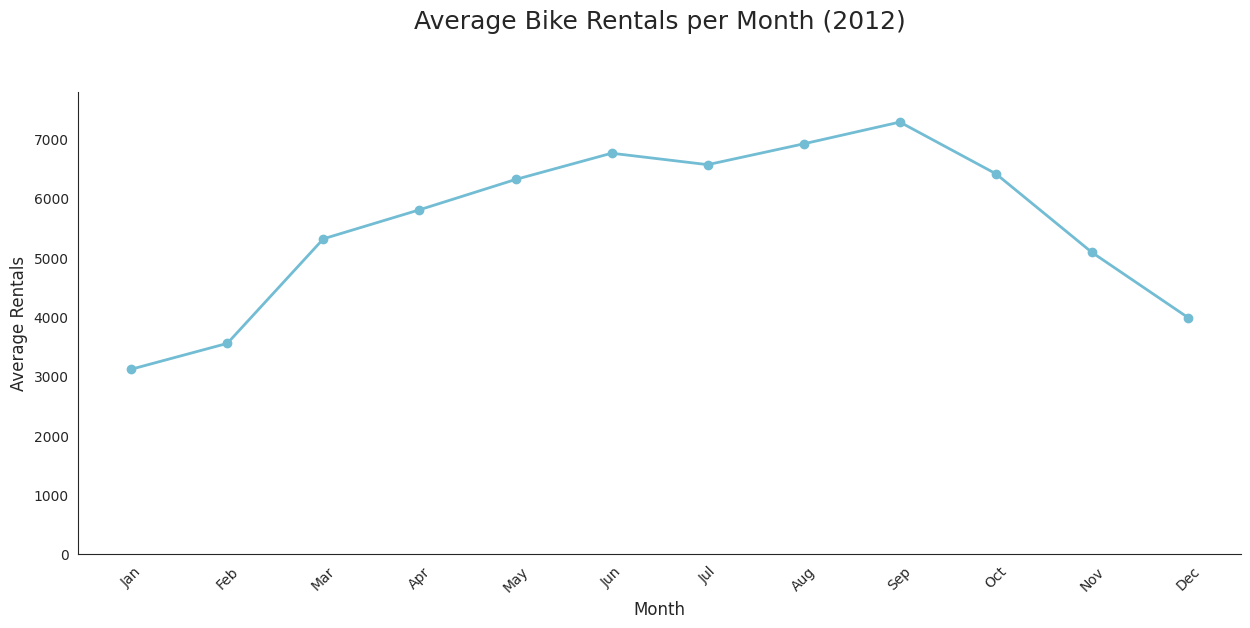

In [266]:
# Correct order of months
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Convert "Month" column to a categorical type with the correct order
avg_permonth_2012["Month"] = pd.Categorical(
    avg_permonth_2012["Month"], categories=month_order, ordered=True
)

# Sort the DataFrame by the month category
avg_permonth_2012 = avg_permonth_2012.sort_values(by="Month")

# Plot line chart
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(avg_permonth_2012["Month"], avg_permonth_2012["avg_rentals"],
        marker='o', linewidth=2, color="#72BCD4")

# Remove background
ax.set_facecolor("white")   # Background color of the plot
fig.patch.set_facecolor("white")  # Background color of the figure
ax.spines["top"].set_visible(False)  # Remove top border
ax.spines["right"].set_visible(False)  # Remove right border

# Set the Y-axis to start at zero
ax.set_ylim(0, avg_permonth_2012["avg_rentals"].max() + 500)  # Add a little margin at the top

# Set title and labels
plt.title("Average Bike Rentals per Month (2012)\n\n", loc="center", fontsize=18)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Rentals", fontsize=12)
plt.xticks(fontsize=10, rotation=45)  # To avoid overlapping month names
plt.yticks(fontsize=10)

# Remove grid if not needed
ax.grid(False)

# Show plot
plt.show()


Grafik Tersebut Menunjukkan bahwa jumlah tren rata rata penyewaan sepeda cenderung rendah di awal dan akhir tahun, dengan puncak di pertengahan tahun.Dan Yang paling banyak di tahun 2012 itu di bulan september

### Pertanyaan 3: Pada musim mana yang memiliki jumlah penyewaan terbanyak ?

In [267]:
# Group the data by season and sum the total rentals for each season
rentals_per_season = day_df.groupby("season")[["cnt"]].sum().reset_index()

# Ensure the "season" column is correctly assigned
rentals_per_season["season"] = rentals_per_season["season"]

# Rename columns for clarity
rentals_per_season.columns = ["Season", "total_rentals"]

# Sort by total rentals in descending order
rentals_per_season = rentals_per_season.sort_values(by="total_rentals", ascending=False)

# Display the result
rentals_per_season


,Season,total_rentals
0,Fall,1061129
2,Summer,918589
3,Winter,841613
1,Spring,471348


<ipython-input-268-fdd72beec256>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Season", y="total_rentals", data=rentals_per_season, palette=colors, ax=ax)


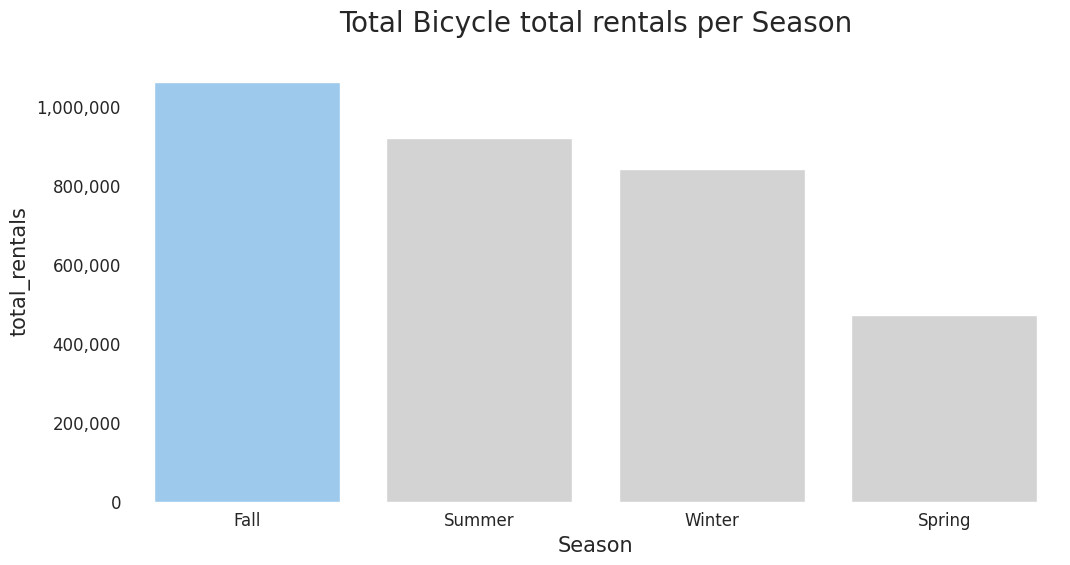

In [268]:
# Using style with no background
sns.set_style("white")

# Determining the season with the highest rentals
max_season = rentals_per_season.loc[rentals_per_season["total_rentals"].idxmax(), "Season"]

# Defining colors: the season with the highest rentals is blue, others are gray
colors = ["#90CAF9" if season == max_season else "#D3D3D3" for season in rentals_per_season["Season"]]

# Creating figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Creating barplot for total rentals per season
sns.barplot(x="Season", y="total_rentals", data=rentals_per_season, palette=colors, ax=ax)

# Adjusting y-axis limits for better proportionality
ax.set_ylim(0, rentals_per_season["total_rentals"].max() * 1.1)

# Formatting y-axis labels for easier readability
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # Format numbers with commas

# Removing background and borders
ax.set_facecolor("white")
for spine in ax.spines.values():
    spine.set_visible(False)

# Adding labels and title
ax.set_ylabel("total_rentals", fontsize=15)
ax.set_xlabel("Season", fontsize=15)
ax.set_title("Total Bicycle total rentals per Season", fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

# Displaying the plot
plt.show()


Berdasarkan grafik di atas musim fall/gugur memiliki jumlah penyewaan terbanyak

### Pertanyaan 4: Berapa banyak jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

In [269]:
# Grouping by working day and summing the rentals
rentals_working_day = day_df.groupby("workingday")[["cnt"]].sum().reset_index()

# Replace column names
rentals_working_day.columns = ["Day", "total_rentals"]

# Replace 'Yes' with 'Working Day' and 'No' with 'Holiday'
rentals_working_day["Day"] = rentals_working_day["Day"].replace({"Yes": "Working Day", "No": "Holiday"})

# Sorting by total_rentals in descending order
rentals_working_day = rentals_working_day.sort_values(by="total_rentals", ascending=False)

# Display the result
rentals_working_day


,Day,total_rentals
1,Working Day,2292410
0,Holiday,1000269


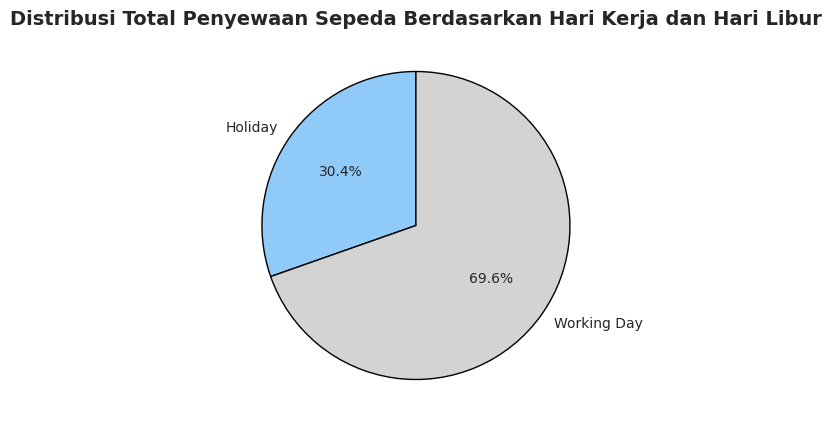

In [270]:
# Menghitung total penyewaan untuk Hari Kerja dan Hari Libur
total_rentals = rentals_working_day.groupby("Day")["total_rentals"].sum()

# Menghapus latar belakang grid
sns.set_style("white")

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(8, 5))

# Membuat pie chart
ax.pie(
    total_rentals,
    labels=total_rentals.index,
    autopct="%1.1f%%",
    colors=["#90CAF9", "#D3D3D3"],
    startangle=90,
    wedgeprops={"edgecolor": "black"}
)

# Menambahkan title
ax.set_title("Distribusi Total Penyewaan Sepeda Berdasarkan Hari Kerja dan Hari Libur", fontsize=14, fontweight="bold")

# Menampilkan plot
plt.show()


Jumlah penyewa sepeda di hari kerja sebanyak 69.6% dan di hari libur 30.4%

### Pertanyaan 5: Pada jam berapa penyewaan sepeda paling tinggi dalam sehari?

In [271]:
# Grouping by hour and calculating the total rentals per hour
rentals_per_hour = hour_df.groupby("hr")[["cnt"]].sum().reset_index()

# Renaming columns
rentals_per_hour.columns = ["Hour", "total_rentals"]

# Sorting by total rentals in descending order
rentals_per_hour_sorted = rentals_per_hour.sort_values(by="total_rentals", ascending=False)

# Finding the top 5 hours with the highest total rentals
top_5 = rentals_per_hour_sorted.nlargest(5, "total_rentals")


<ipython-input-272-d4f2fc1ee51d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


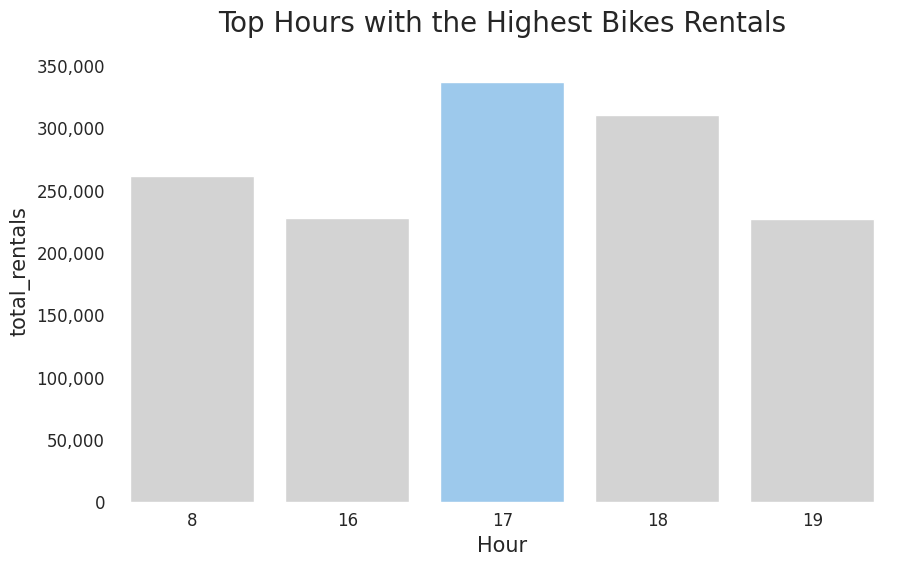

In [272]:
# Taking the top 5 hours with the highest total rentals
top_5 = rentals_per_hour.nlargest(5, "total_rentals")

# Set all bars to gray
colors = ["#D3D3D3"] * len(top_5)

# Change the color of the third bar to blue
colors[2] = "#90CAF9"  # Blue for the 3rd bar

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart with the pre-defined colors
sns.barplot(
    x="Hour",
    y="total_rentals",
    data=top_5,
    palette=colors,  # Using the predefined colors
    ax=ax
)

# Remove border lines
for spine in ax.spines.values():
    spine.set_visible(False)

# Adjust the upper limit of the y-axis to make the chart more spacious
ax.set_ylim(0, top_5["total_rentals"].max() * 1.1)

# Format the y-axis to make the numbers easier to read
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Add title and labels
ax.set_title("Top Hours with the Highest Bikes Rentals", loc="center", fontsize=20)
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("total_rentals", fontsize=15)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Show the plot
plt.show()


Berdasarkan grafik diatas pada jam 17 penyewaan sepeda paling tinggi dalam sehari

**Insight:**
- Kinerja penyewaan sepeda beberapa tahun terakhir mengalami peningkatan dari tahun 2011 ke 2012 total penyewaan meningkat
- Jumlah tren rata rata penyewaan sepeda cenderung rendah di awal dan akhir tahun, dengan puncak di pertengahan tahun.Dan Yang paling banyak di tahun 2012 itu di bulan september
- Berdasarkan musim , musim fall/gugur memiliki jumlah penyewaan terbanyak
- Jumlah penyewa sepeda di hari kerja sebanyak 69.6% dan di hari libur 30.4%
- Berdasarkan jam, jam 17 penyewaan sepeda paling tinggi dalam sehari

## Analisis Lanjutan

### RFM Analysis

RFM Analysis digunakan untuk menganalisis perilaku pelanggan berdasarkan tiga faktor utama, yaitu
- Recency (seberapa baru pelanggan melakukan pembelian),
- Frequency (berapa sering pelanggan melakukan pembelian), dan
- Monetary (berapa banyak uang yang dibelanjakan oleh pelanggan). Ketiga faktor ini membantu dalam memahami sejauh mana keterlibatan pelanggan dan memberikan wawasan untuk strategi pemasaran yang lebih tepat sasaran.

In [273]:
current_date = max(hour_df['dteday'])
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'cnt': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

rfm_df.head()

,registered,Recency,Frequency,Monetary
0,0,38,24,35
1,1,0,201,294
2,2,1,245,648
3,3,0,294,1154
4,4,3,307,1602


## Conclusion

- Conclusion Pertanyaan 1 : Kinerja penyewaan sepeda dalam beberapa tahun terakhir menunjukkan peningkatan, dengan total penyewaan yang meningkat dari tahun 2011 ke 2012.
- Conclusion Pertanyaan 2 :Tren rata-rata penyewaan sepeda cenderung rendah di awal dan akhir tahun, dengan puncak tertinggi di pertengahan tahun. Bulan dengan penyewaan terbanyak pada tahun 2012 adalah bulan September.
- Conclusion Pertanyaan 3 : Berdasarkan musim, musim gugur (fall) memiliki jumlah penyewaan terbanyak.
- Conclusion Pertanyaan 4 : Sebanyak 69,6% penyewaan sepeda terjadi pada hari kerja, sementara 30,4% terjadi pada hari libur.
- Conclusion Pertanyaan 5 : Berdasarkan jam, penyewaan sepeda tertinggi terjadi pada pukul 17:00 setiap harinya.